In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
from math import pi, sqrt

In [11]:
state = [1/sqrt(2), 0, 0, 1/sqrt(2)]

qc = QuantumCircuit(2) # two qubit circuit
qc.initialize(state)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw()

┌──────────────────────────────────┐┌───┐ ░ ┌─┐   
   q_0: ┤0                                 ├┤ H ├─░─┤M├───
        │  initialize(0.70711,0,0,0.70711) │├───┤ ░ └╥┘┌─┐
   q_1: ┤1                                 ├┤ H ├─░──╫─┤M├
        └──────────────────────────────────┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1

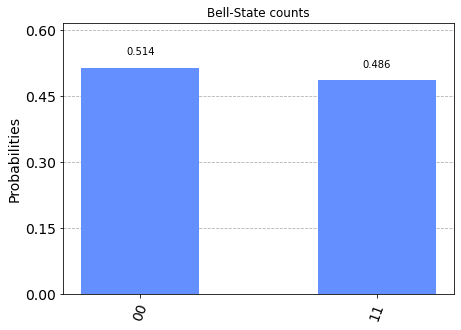

In [12]:
# Transpile for simulator
backend = Aer.get_backend('aer_simulator')
qc = transpile(qc, backend)

# Run and get counts
result = backend.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Bell-State counts')